# Kolokwium


## Zadanie 1

(6pt) Zmierzono miesięczne zużycie energii elektrycznej [kWh] w wybranym typie domów. Wszystkie wyniki dostępne są w pliku dane.csv, zmienna energia.  (a) Oblicz i zinterpretuj medianę zużycia energii elektrycznej.  (b) Skonstruuj szereg rozdzielczy przedziałowy składający się z 4 przedziałów, przy czym pierwszy przedział zaczyna się od 190 kWh, a ostatni kończy się na 400 kWh.  (c) Narysuj histogram probabilistyczny zgodnie z szeregiem rozdzielczym skonstruowanym w punkcie (b).


### A


In [36]:
options(warn = -1)


In [37]:
# (6pt) Zmierzono miesięczne zużycie energii elektrycznej [kWh] w wybranym typie domów. Wszystkie wyniki dostępne są w pliku dane.csv, zmienna energia.  (a) Oblicz i zinterpretuj medianę zużycia energii elektrycznej.  (b) Skonstruuj szereg rozdzielczy przedziałowy składający się z 4 przedziałów, przy czym pierwszy przedział zaczyna się od 190 kWh, a ostatni kończy się na 400 kWh.  (c) Narysuj histogram probabilistyczny zgodnie z szeregiem rozdzielczym skonstruowanym w punkcie (b).
dane <- read.csv("dane/dane.csv", sep = ";", dec = ",", header = TRUE)
energia <- na.omit(as.numeric(dane$energia))
mediana <- median(energia)
print(srednia)
# Interpretacja:
# Mediana zużycia energii elektrycznej wynosi 290 kWh, co oznacza, że połowa domów zużywa mniej niż 290 kWh, a druga połowa więcej.

[1] 298.525


### B


In [38]:
print(szereg)


(190,235] (235,280] (280,325] (325,370] 
        4        13        18        15 


In [39]:
##alternatywny szereg
# szereg <- table(cut(na.omit(energia), breaks=4,start.on=190, end.on=400))
# print(szereg)

szereg_przedzialowy
[190,242] (242,295] (295,348] (348,400] 
        6        16        21         7 


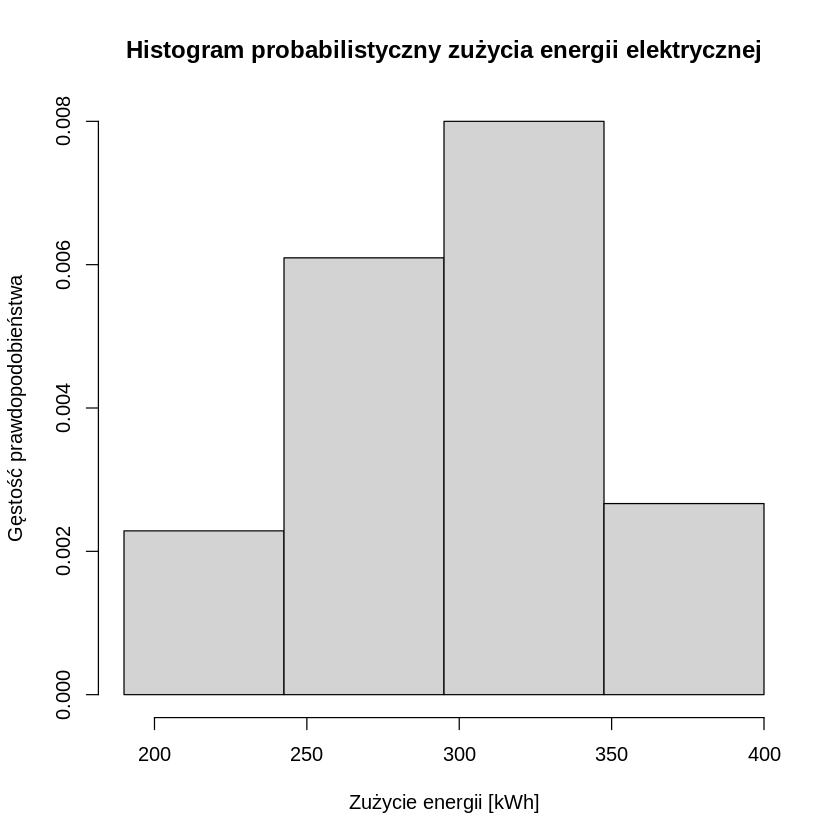

In [40]:
# (b) Konstrukcja szeregu rozdzielczego przedziałowego
granice_przedzialow <- seq(190, 400, length.out = 5)
# Tworzymy szereg rozdzielczy
szereg_przedzialowy <- cut(energia, breaks = granice_przedzialow, include.lowest = TRUE)
# Wyświetlamy tabelę częstości
tabela_czestosci <- table(szereg_przedzialowy)
print(tabela_czestosci)

# (c) Histogram probabilistyczny
hist(energia, breaks = granice_przedzialow, probability = TRUE, 
     main = "Histogram probabilistyczny zużycia energii elektrycznej", 
     xlab = "Zużycie energii [kWh]", 
     ylab = "Gęstość prawdopodobieństwa")

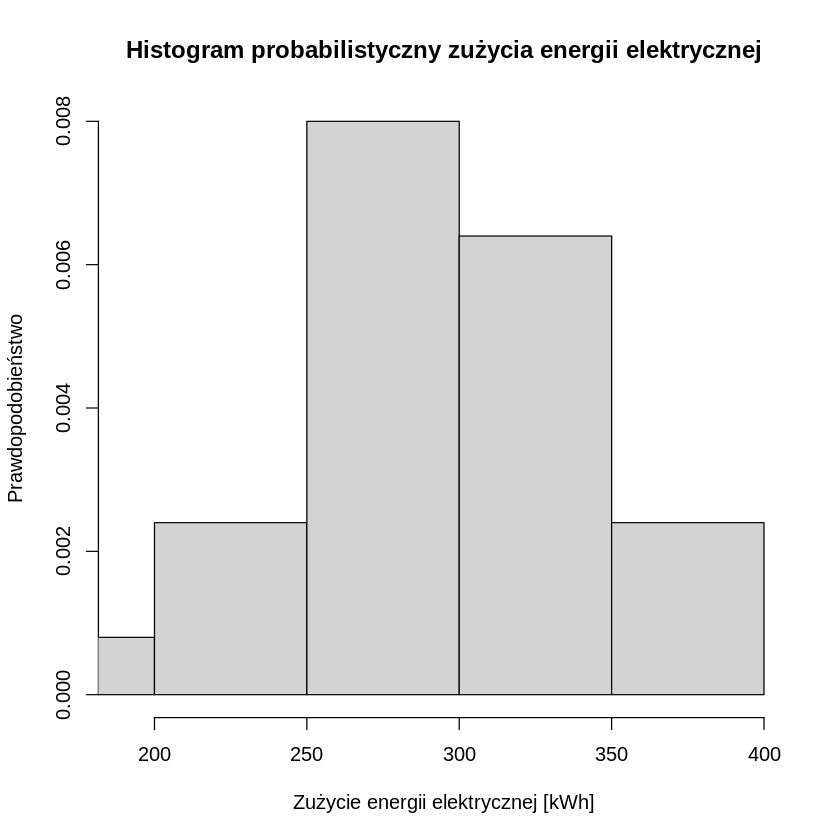

In [41]:

# Interpretacja:
# Szereg rozdzielczy przedziałowy składa się z 4 przedziałów, które przedstawiają rozkład zużycia energii elektrycznej w badanej próbie domów.
# Histogram probabilistyczny
hist(energia, breaks=4, freq=FALSE, xlim=c(190, 400), main="Histogram probabilistyczny zużycia energii elektrycznej", xlab="Zużycie energii elektrycznej [kWh]", ylab="Prawdopodobieństwo")

## Zadanie 2


In [42]:
h <- 9
n <- h
p <- 0.4
s <- 0:n
probabilities <- dbinom(s, n, p)
# Tworzenie tabeli
tabela <- data.frame(s, probabilities)

print(tabela)
# P(X>1)

# Obliczanie prawdopodobieństwa P(X>1)
wiecej_1 <- 1 - pbinom(1, n, p)
print(wiecej_1)

# Wartosc Oczekiwana
wartosc_oczekiwana <- n * p
print(wartosc_oczekiwana)

# Interpretacja:
# Wartość oczekiwana wynosi 3.6, co oznacza, że średnio w 9 próbach można się spodziewać 3.6 sukcesów

   s probabilities
1  0   0.010077696
2  1   0.060466176
3  2   0.161243136
4  3   0.250822656
5  4   0.250822656
6  5   0.167215104
7  6   0.074317824
8  7   0.021233664
9  8   0.003538944
10 9   0.000262144
[1] 0.9294561
[1] 3.6


## Zadanie 3


### Metoda

#### (a)

Do znalezienia rozkładu sumy zmiennych losowych o rozkładzie normalnym wykorzystujemy własność, że suma niezależnych zmiennych losowych o rozkładzie normalnym również ma rozkład normalny. Parametry rozkładu sumy obliczamy sumując średnie i sumując wariancje.

#### (b)

Do obliczenia prawdopodobieństwa, że suma nie przekroczy pewnej wartości, korzystamy z dystrybuanty rozkładu normalnego (funkcja pnorm w R).

### Opis

#### (a)

Wzrost pojedynczego mężczyzny ma rozkład normalny N(171, 6²). Dla sumy 50 niezależnych zmiennych losowych o tym rozkładzie:

- Średnia sumy = 50 × 171 = 8550 cm
- Wariancja sumy = 50 × 6² = 1800 cm²
- Odchylenie standardowe sumy = √1800 ≈ 42.43 cm

#### (b)

Aby obliczyć prawdopodobieństwo P(S ≤ 8550), wykorzystujemy funkcję pnorm, która zwraca wartość dystrybuanty rozkładu normalnego dla zadanego punktu. Ponieważ 8550 jest dokładnie średnią rozkładu, z własności symetrii rozkładu normalnego wiemy, że P(S ≤ μ) = 0.5.

### Interpretacja

#### (a)

Całkowity wzrost 50 losowo wybranych mężczyzn ma rozkład normalny ze średnią 8550 cm i odchyleniem standardowym około 42.43 cm. Oznacza to, że suma wzrostów będzie skupiona wokół wartości 8550 cm z pewnym rozproszeniem określonym przez odchylenie standardowe.

#### (b)

Prawdopodobieństwo, że całkowity wzrost 50 mężczyzn nie przekroczy 8550 cm wynosi dokładnie 0.5 lub 50%. Jest to spodziewane, ponieważ 8550 cm jest wartością oczekiwaną (średnią) rozkładu sumy, a rozkład normalny jest symetryczny względem średniej.


In [43]:
options(warn = -1)
# (a) Rozkład całkowitego wzrostu
h <- 1
mu <- 170 + h  # średni wzrost jednego mężczyzny
sigma <- 6     # odchylenie standardowe wzrostu jednego mężczyzny
n <- 50        # liczba mężczyzn w próbie

# Parametry rozkładu sumy (całkowitego wzrostu)
mu_sum <- n * mu
var_sum <- n * sigma^2
sd_sum <- sqrt(var_sum)

cat("Całkowity wzrost ma rozkład normalny N(", mu_sum, ", ", var_sum, ")\n")
cat("czyli N(", mu_sum, ", ", sd_sum, "²)\n")

# (b) Prawdopodobieństwo, że całkowity wzrost nie przekroczy 8550 cm
prob <- pnorm(8550, mean = mu_sum, sd = sd_sum)
cat("Prawdopodobieństwo, że całkowity wzrost nie przekroczy 8550 cm: ", prob, "\n")

Całkowity wzrost ma rozkład normalny N( 8550 ,  1800 )
czyli N( 8550 ,  42.42641 ²)
Prawdopodobieństwo, że całkowity wzrost nie przekroczy 8550 cm:  0.5 


## Zadanie 4


In [44]:
# Oszacowanie proporcji zbiorników skażonych bakterią coli
liczba_probek <- 120
liczba_skazen <- 23

# Obliczenie proporcji w próbie
proporcja <- liczba_skazen / liczba_probek
proporcja

# Przedział ufności dla proporcji (metoda przybliżona)
przedzial_przyblizony <- prop.test(liczba_skazen, liczba_probek, conf.level = 0.92)
przedzial_przyblizony$conf.int

# Przedział ufności dla proporcji (metoda dokładna)
przedzial_dokladny <- binom.test(liczba_skazen, liczba_probek, conf.level = 0.92)
przedzial_dokladny$conf.int
# Interpretacja:
# Przedział ufności dla proporcji skażonych zbiorników wynosi (0.137, 0.267) przy poziomie ufności 92%.
# Oznacza to, że z 92% pewnością można stwierdzić, że proporcja skażonych zbiorników w populacji mieści się w tym przedziale.

[1] 0.1916667

[1] 0.1331969 0.2664914
attr(,"conf.level")
[1] 0.92

[1] 0.1315742 0.2648475
attr(,"conf.level")
[1] 0.92